In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

In [2]:
wine = pd.read_csv('winequality-red[1].csv',sep=';')

In [3]:
wine['quality'].min()

3

In [4]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [5]:
wineT = wine

In [6]:
wineT['qualityDummy'] = 0

In [7]:
wineT

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityDummy
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0


In [8]:
wineT['alcohol'][0]

9.4

In [9]:
for x in range(len(wineT)):
    if wineT['quality'][x] >= 7:
        wineT['qualityDummy'][x] = 1
#     elif wineT['quality'][x] >=5:
#         wineT['qualityDummy'][x] = 1

C:\Users\Amrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
wineT

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityDummy
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0


In [11]:
X = wineT[['fixed acidity','pH','alcohol','citric acid', 'residual sugar','density','volatile acidity','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']]
y = wineT['qualityDummy'].values.reshape(-1,1)

In [12]:
X.shape

(1599, 11)

In [13]:
y.shape

(1599, 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

Using TensorFlow backend.
C:\Users\Amrit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

In [17]:
deep_model = Sequential()
deep_model.add(Dense(units=60, activation='relu', input_dim=11))
deep_model.add(Dense(units=60, activation='relu', input_dim=11))
deep_model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                720       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 122       
Total params: 4,502
Trainable params: 4,502
Non-trainable params: 0
_________________________________________________________________


In [19]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 0s - loss: 0.4596 - acc: 0.8265
Epoch 2/200
 - 0s - loss: 0.3119 - acc: 0.8724
Epoch 3/200
 - 0s - loss: 0.2832 - acc: 0.8766
Epoch 4/200
 - 0s - loss: 0.2715 - acc: 0.8799
Epoch 5/200
 - 0s - loss: 0.2642 - acc: 0.8857
Epoch 6/200
 - 0s - loss: 0.2608 - acc: 0.8849
Epoch 7/200
 - 0s - loss: 0.2543 - acc: 0.8882
Epoch 8/200
 - 0s - loss: 0.2501 - acc: 0.8882
Epoch 9/200
 - 0s - loss: 0.2461 - acc: 0.8907
Epoch 10/200
 - 0s - loss: 0.2428 - acc: 0.8932
Epoch 11/200
 - 0s - loss: 0.2383 - acc: 0.8891
Epoch 12/200
 - 0s - loss: 0.2340 - acc: 0.8949
Epoch 13/200
 - 0s - loss: 0.2315 - acc: 0.8957
Epoch 14/200
 - 0s - loss: 0.2268 - acc: 0.8982
Epoch 15/200
 - 0s - loss: 0.2244 - acc: 0.8907
Epoch 16/200
 - 0s - loss: 0.2209 - acc: 0.8982
Epoch 17/200
 - 0s - loss: 0.2174 - acc: 0.8974
Epoch 18/200
 - 0s - loss: 0.2161 - acc: 0.8991
Epoch 19/200
 - 0s - loss: 0.2121 - acc: 0.9058
Epoch 20/200
 - 0s - loss: 0.2103 - acc: 0.8991
E

Epoch 166/200
 - 0s - loss: 0.0163 - acc: 0.9967
Epoch 167/200
 - 0s - loss: 0.0106 - acc: 0.9983
Epoch 168/200
 - 0s - loss: 0.0121 - acc: 0.9983
Epoch 169/200
 - 0s - loss: 0.0097 - acc: 0.9992
Epoch 170/200
 - 0s - loss: 0.0076 - acc: 0.9992
Epoch 171/200
 - 0s - loss: 0.0080 - acc: 0.9992
Epoch 172/200
 - 0s - loss: 0.0072 - acc: 0.9992
Epoch 173/200
 - 0s - loss: 0.0098 - acc: 0.9983
Epoch 174/200
 - 0s - loss: 0.0140 - acc: 0.9958
Epoch 175/200
 - 0s - loss: 0.0106 - acc: 0.9975
Epoch 176/200
 - 0s - loss: 0.0101 - acc: 0.9983
Epoch 177/200
 - 0s - loss: 0.0073 - acc: 0.9992
Epoch 178/200
 - 0s - loss: 0.0078 - acc: 0.9983
Epoch 179/200
 - 0s - loss: 0.0068 - acc: 0.9992
Epoch 180/200
 - 0s - loss: 0.0052 - acc: 0.9992
Epoch 181/200
 - 0s - loss: 0.0082 - acc: 0.9983
Epoch 182/200
 - 0s - loss: 0.0087 - acc: 0.9983
Epoch 183/200
 - 0s - loss: 0.0079 - acc: 0.9992
Epoch 184/200
 - 0s - loss: 0.0085 - acc: 0.9983
Epoch 185/200
 - 0s - loss: 0.0063 - acc: 0.9983
Epoch 186/200
 - 0s 

In [20]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 0.5765289014577866, Accuracy: 0.8975


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_predictions = deep_model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

C:\Users\Amrit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Amrit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: [0 0 0 0 0]
Actual Labels: [array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64)]


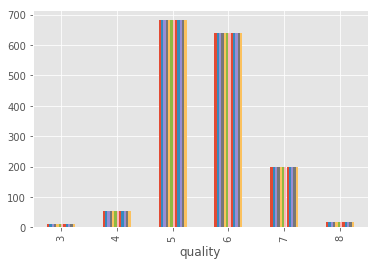

In [23]:
wine.groupby(['quality']).count().plot(kind='bar', legend=False)